In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ -9.21719629,  -3.13720531],
       [  8.73908759,  -3.83735719],
       [-11.4258515 ,  -4.92786007],
       ...,
       [  9.74355459,  -5.79351335],
       [ -5.24453491,   1.74868719],
       [  8.41394322,  -3.68234579]], shape=(1000, 2))

In [4]:
y

array([0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0,
       0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2,
       0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1,
       1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2,

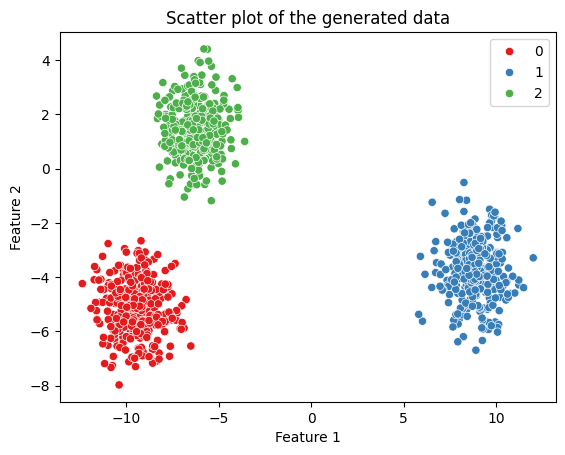

In [13]:
sns.scatterplot(x = 'X1', y = 'X2', data= pd.DataFrame(X, columns=['X1', 'X2']), hue=y, palette='Set1')
plt.title('Scatter plot of the generated data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [14]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
from sklearn.cluster import KMeans

In [19]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[1340.0000000000007,
 678.8707368940937,
 81.98969874400457,
 64.24714886835962,
 49.4508678434868,
 46.215613224085104,
 31.185271440475198,
 30.10012348363414,
 25.58357079365443,
 22.15568212142258]

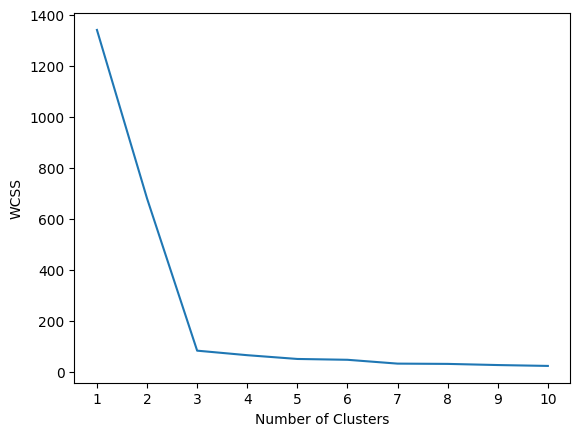

In [22]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [24]:
kmeans.fit_predict(X_train_scaled)

array([2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1,
       2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2,
       1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0,

In [25]:
y_pred=kmeans.predict(X_test_scaled)

In [26]:
y_pred

array([2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2,

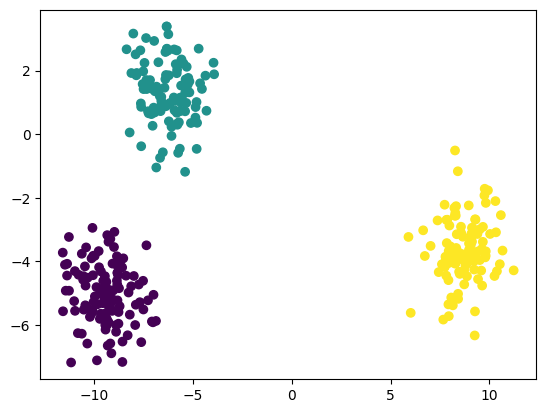

In [27]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [25]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [28]:
## kneelocator
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [29]:
from kneed import KneeLocator

In [36]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [37]:
kl.elbow

np.int64(3)

In [31]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    print(f"kmeans.labels_ for k={k}: {kmeans.labels_}")
    silhouette_coefficients.append(score)

kmeans.labels_ for k=2: [0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 

In [33]:
silhouette_coefficients

[np.float64(0.5844308032077876),
 np.float64(0.8101714383991382),
 np.float64(0.6896400379197701),
 np.float64(0.5555933072438858),
 np.float64(0.4543412303988287),
 np.float64(0.4531342799416247),
 np.float64(0.4254988164134815),
 np.float64(0.40814792301207725),
 np.float64(0.38757550440786365)]

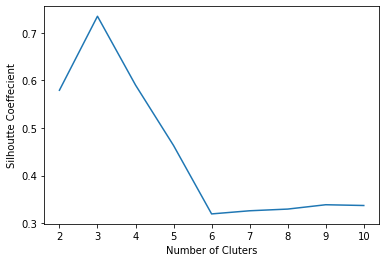

In [33]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()